<a href="https://colab.research.google.com/github/Computer-CGuy/Submerge/blob/master/SUBMERGE_BACKUP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUBMERGE NETWORK



#### Including modules

In [0]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import cv2
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import OneHotEncoder


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
size = 28


### Seperate Functions



*   ``` getBinaryImage(img) ``` converts image to binary values(0 and 1)



*    ``` merge(img1,img2) ``` AND 2 images based on weigths

*    ``` fading(img3,cord) ``` takes an image and add cord, and make an epicenter on the image at the cord






In [0]:
def getBinaryImage(img):
  ret = np.where(img<0.5,0,1)
  return ret

In [0]:
def getBinaryImagePt(img):
  a1 = nn.Threshold(0.5,1)
  # img*=-1
  img = a1(img)
  # print(img)
  img = torch.mul(img,-1)
  # print(img)
  a2 = nn.Threshold(-0.99,0)
  img = a2(img)
  
  # img*=-1
  img = torch.mul(img,-1)

  # img = nn.Threshold(0.5,1)
  # ones = torch.ones(img.shape)
  # zeros = torch.zeros(img.shape)
  # ret = torch.where(img<0.5,zeros,ones)
  return img

In [0]:
def merge(img1,img2):
  ret = np.multiply(img1,img2)
  return ret

In [0]:
def mergePt(img1,img2):
  rel = torch.mul(img1,img2)
  # ret = img1*img2
  return ret

In [0]:
def fading(img3,cord):
  
  for color in range(1,255,1):
    cv2.circle(img3,cord,2+int(400/color),(color),thickness=-1)
  return img3

In [0]:
def drawCircle(color,cord=(12,12)):
  img = np.zeros((size,size))  
  r = 5
  for x in range(size):
    for y in range(size):
      dist = ((((x-cord[0])**2)+((y-cord[1])**2))**(1/2))
      if(dist<r):
        img[x][y] = color
  return img
        # print(r-dist)
  # cv2_imshow(img)

In [0]:
def sumGrad(img,cord=(12,12)):
  # img = np.zeros((size,size))  
  r = 5
  suma = 0
  for x in range(size):
    for y in range(size):
      dist = ((((x-cord[0])**2)+((y-cord[1])**2))**(1/2))
      if(dist<r):
        suma+=img[x,y]
  return suma
        # print(r-dist)
  # cv2_imshow(img)

In [0]:
def fadingPt(cords):
  cords = cords.cpu().detach().numpy()
  img = np.zeros((10,24,24))
  for x in range(10):
    # print(cords[x][0])
    for color in range(1,255,1):
      c = torch.Variable(color)
      
      # cv2.circle(img[x],(int(cords[x][0]),int(cords[x][1])),2+int(400/color),(color),thickness=-1)
  return img

In [0]:
def fadingPt(cords):
  cords = cords.cpu().detach().numpy()
  # print(cords)
  img = np.zeros((10,size,size))
  for x in range(10):
    # print(cords[x][0])
    for color in range(1,255,1):
      cv2.circle(img[x],(int(cords[x][0]),int(cords[x][1])),2+int(400/color),(color),thickness=-1)
  img = torch.Tensor(img)
  return img

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<FadingBackward>)


### Truth table of merge

In [0]:
 img1 img2
1    1    1
0    0    0
1    0    0
0    0    0

### ``` fading()``` example

In [0]:
img2 = np.zeros((size,size))
cv2_imshow(fading(img2,(10,10)))

### Submerge 2 images

In [0]:
img = torch.rand((1,1,24,24))

In [0]:
cv2_imshow(getBinaryImage(img[0][0].detach().numpy())*255)

In [0]:
cv2_imshow(merge(getBinaryImage(img[0][0].detach().numpy()),img2))

### Application-Type Implementation


*   Takes in weights (2D Layer), Location(3D (X,Y) at weights indices) layers.
*   Applies the submerge algorithms
*   Sums up all the outputs.
*   Later difference will also be implemented.

#### Sources


*   https://stackoverflow.com/questions/16229823/how-to-multiply-numpy-2d-array-with-numpy-1d-array
*   https://pytorch.org/docs/stable/torch.html#torch.where
*   Read this https://discuss.pytorch.org/t/will-the-slice-operation-on-a-list-be-traced-back-in-autograd/21482/4
*   Image to dataframe https://stackoverflow.com/questions/49649215/pandas-image-to-dataframe


In [0]:
weights = torch.Tensor([[1,2,4]])
loc = torch.Tensor([[[0,1],[12,12],[90,90]]])

In [0]:
weights.shape

torch.Size([1, 3])

In [0]:
loc.shape

torch.Size([1, 3, 2])

In [0]:
memory = getBinaryImagePt(torch.rand((1,10,24,24)))

In [0]:
cv2_imshow(memory[0][0].detach().numpy()*255)

In [0]:
cords = (torch.rand((10,2))*24).round().int()

In [0]:
subms = torch.Tensor(fadingPt(cords))
add_subms = torch.mul(subms,memory)

In [0]:
add_subms.shape

torch.Size([1, 10, 24, 24])

In [0]:
added = (add_subms.mean(dim=1))

In [0]:
added.shape

torch.Size([1, 24, 24])

In [0]:
cv2_imshow(added[0].cpu().detach().numpy())

In [0]:
for h in range(10):
  cv2_imshow(add_subms[0][h].cpu().detach().numpy())

In [0]:
weights = torch.rand(10)
mul = add_subms* weights[:,None,None]
mul.shape

torch.Size([1, 10, 24, 24])

In [0]:
image = torch.sum(mul,1)
image.shape
cv2_imshow(image.detach().numpy()[0])

### Functions Equality

In [0]:
def getImageAdd(cords_add,memory_add,weights_add):
  memory = getBinaryImagePt(memory_add)
  # cords = (torch.rand((10,2))*24).round().int()
  subms_add = torch.Tensor(fadingPt(cords_add)).cuda()
  add_subms = torch.mul(subms_add,memory_add)
  # print(add_subms.shape)
  # weights = torch.rand(10)
  # add_subms.mul()
  mul = add_subms * weights_add[:,None,None]
  # u = weights[:,None,None].mul(add_subms)
  image = torch.sum(mul,dim=1)
  # mul.sum(dim=1)
  return image

In [0]:
def getImageSub(cords_sub,memory_sub,weights_sub):
  memory = getBinaryImagePt(memory_sub)
  # cords = (torch.rand((10,2))*24).round().int()
  subms_sub = torch.Tensor(fadingPt(cords_sub)).cuda()
  add_subms = torch.mul(subms_sub,memory_sub)
  # weights = torch.rand(10)
  # add_subms.mul()
  mul = add_subms * weights_sub[:,None,None]
  # u = weights[:,None,None].mul(add_subms)
  image = torch.sum(mul,dim=1)
  # mul.sum(dim=1)
  return image

In [0]:
weights_add = torch.rand(10,requires_grad=True)
memory_add = getBinaryImagePt(torch.rand((1,10,24,24),requires_grad=True))
cords_add = (torch.rand((10,2),requires_grad=True)*24).round().int()

In [0]:
torch.manual_seed(200)

In [0]:
add = (getImageAdd(cords_add,memory_add,weights_add)[0].cpu().detach().numpy())

cv2_imshow(add)

In [0]:
weights_sub = torch.rand(10)
memory_sub = getBinaryImagePt(torch.rand((1,10,24,24)))
cords_sub = (torch.rand((10,2))*24).round().int()

In [0]:
sub = (getImageSub(cords_sub,memory_sub,weights_sub)[0].cpu().detach().numpy())
cv2_imshow(sub)

In [0]:
cv2_imshow(add-sub)    

### Pytorch Implementation

In [0]:
class Fading(torch.autograd.Function):
    @staticmethod
    def forward(ctx,input,memory_add,mines,memory_sub):
        # input = input[0]/
        # print(input)
        # with torch.no_grad():
        # print(input.grad_fn)
        ins = input

        # with torch.no_grad():
        
        input = input[0]
        indices = mines*3
        add = input[:indices]
        
        cords_add = add[:(mines*2)]
        # print(cords_add)
        cords_add = cords_add.view((10,2)).int()
        # print(cords_add)
        weights_add = add[(mines*2):]
        add1 = getImageAdd(cords_add,memory_add,weights_add)

        sub = input[indices:]
        cords_sub = sub[:(mines*2)].int()
        cords_sub = cords_sub.view((10,2)).int()

        weights_sub = sub[(mines*2):]
        sub1 = getImageSub(cords_sub,memory_sub,weights_sub)
        
        output = add1-sub1
        
        # """
        # In the forward pass we receive a Tensor containing the input and return
        # a Tensor containing the output. ctx is a context object that can be used
        # to stash information for backward computation. You can cache arbitrary
        # objects for use in the backward pass using the ctx.save_for_backward method.
        # """
        # # print(ctx)
        # # print(input)
        # ret = torch.cat((ins.squeeze(0),output.flatten()))
        # ctx.save_for_backward(ins.squeeze(0))

        # print(input.shape)
        # print(output.shape)
        # print(ins.grad_fn)
        # a = torch.cat((ins.squeeze(0),output.flatten()))
        ctx.save_for_backward(ins,output,cords_add,cords_sub)
        # ctx.save_for_backward(output)
        
        # return output,ins
        return (ins,output)
    @staticmethod
    def backward(ctx, grad_output,grad_output1):
        # print(grad_output1.shape)
        # print(grad_output)
        global GRAD
        GRAD = (grad_output,grad_output1)
        # print('go',grad_output)
        # print('g1',grad_output1)
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        # print(ctx.saved_tensors)
        input,out,cords_add,cords_sub = ctx.saved_tensors
        grad_input = grad_output.clone()
        # grad_input[input < 0] = 0
        # return out*grad_input,None,None,None
        # return input*grad_output
        # print(grad_output.shape)
        ##m = grad_output1.mean().cpu().detach().numpy()
        # print(m)
        ##e = torch.Tensor(np.array([m for x in range(60)])).unsqueeze(0).cuda()
        # seq1 = [0.9 for x in range(20)]
        # seq2 = [0.2 for x in range(10)]
        # comb = seq1+seq2+seq1+seq2
        # s = torch.Tensor(np.array([comb])).unsqueeze(0).cuda()
        
        # print(e)
        # print(grad_output)
        
        # i = torch.Tensor(getGRAD(GRAD[0][0].detach().cpu().numpy(),GRAD[1][0].detach().cpu().numpy(),10)).cuda().unsqueeze(0)
        # global gr
        # gr = i
        # j = GRAD[1].mean()
        # i = i/((i.mean()/j))
        mines = 10
        #For ADD
        ine = input
        input = np.array([0 for x in range(mines*6)])
        for x_x in range(mines):
            grad_temp = sumGrad(GRAD[1],cord=(cords_add[x_x].detch().cpu().numpy().tolist()))
            input[  x_x*2  , x_x*2+1 ] = grad_temp
            input[mines*2 + x_x] = grad_temp

        #For SUB
        for x_x in range(mines*3,mines*5):
            grad_temp = sumGrad(GRAD[1],cord=(cords_sub[mines*3-x_x].detch().cpu().numpy().tolist()))
            input[  x_x*2  , x_x*2+1 ] = grad_temp
            input[mines*2 + x_x] = grad_temp
        input = Torch.tensor(input)
        return input,None,None,None

In [0]:
seq1 = [0.9 for x in range(20)]
seq2 = [0.2 for x in range(10)]


In [0]:
print(seq1+seq2)

[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


In [0]:
GRAD[0].shape

torch.Size([1, 60])

In [0]:
GRAD[1].shape

torch.Size([1, 28, 28])

In [0]:
from sklearn.cluster import KMeans
from math import pi
def getCenter(data,u=0):
  if(u!=0):
    data[:,2] = (data[:,2].max()-data[:,2])
  kmeans = KMeans(n_clusters=10, random_state=1)
  kmeans.fit(data[:,:2],sample_weight=data[:,2])
  center = kmeans.cluster_centers_
  return center
def distancei(a,b,i):
  return abs(a[i]-b[i])
  # return (  ((a[0]-b[0])**2)+ ((a[1]-b[1])**2) )**(1/2)
def getGRAD(input,grad,index):
  img = ImageToData2D(grad)
  
  ret = np.copy(input)

  for u in [0,index*3]:
    l = input[u:(index*2)+u].reshape(-1,2)
    center  = getCenter(img,u)
    for x in range(len(l)):
      minx = 999999
      miny = 999999
      wix = 999999
      for y in range(len(center)):
        wx = getJuclideanDistance(l[x],center[y],10)
        dy = getEuclideanDistance(l[x],center[y])
        # dy = distancei(l[x],center[y],1)
        if(wx<wix):
          wix = wx
        if(dy<miny):
          miny = dy
      ret[u+(x*2)]=miny
      ret[u+(x*2)+1]=miny
      ret[u+(index*2)+x] = wx
      # ret[u+(index*2)+x]=((minx**2)+(miny**2))**(1/2)
      # print(u+(x*2),minx)
  return ret
def ImageToData2D(img):
    colourArray = np.array(img).reshape((img.shape[1],img.shape[0]) + (1,))
    indicesArray = np.moveaxis(np.indices((img.shape[1],img.shape[0])), 0, 2)
    # print(indicesArray.shape)
    # print(colourArray.shape)
    allArray = np.dstack((indicesArray, colourArray)).reshape((-1, 3))
    
    return allArray
def getEuclideanDistance(a,b):
    return (((a[0]-b[0])**(2))+((a[1]-b[1])**(2)))**(1/2)
def getJuclideanDistance(c1,c2,r=2):
    d = getEuclideanDistance(c1,c2)
    # r = 6
    common_area = getAreaOfIntersection(d,r)
    # print(common_area)
    ret = (common_area/((2*areaOfCircle(r))-common_area))
    # print(ret)
    
    # /
    # if(ret>0):
    #   ret = (1-ret)
    # else:
    #   ret = 1
    # ret = 1-ret
    return 1-ret
def areaOfCircle(r):
    return pi*(r**2)
def getAreaOfIntersection(d,r):
    R = r
    # if(d<r):
    ni= ((-d+r+R)*(d+r-R)*(d-r+R)*(d+r+R))
    if(ni<0):
      # area = 0
      ni = 0
    area = (1/2)*(ni**(1/2))
    # print(area)
    # print(ni)
    
    # if(d>r):
    # area = 0
    return area

In [0]:
getJuclideanDistance([24,1],[0,1],r=10)

1.0

In [0]:
15.612494995995995/((2*areaOfCircle(4))-15.612494995995995)

0.1838527591336798

In [0]:
pi

3.141592653589793

In [0]:
GRAD[0].shape

torch.Size([1, 60])

In [0]:
torch.Tensor(getGRAD(GRAD[0][0].detach().cpu().numpy(),GRAD[1][0].detach().cpu().numpy(),10)).unsqueeze(0)

(28, 28, 2)
(28, 28, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  


torch.Size([1, 60])

In [0]:
# Add 30
## cords_add 20
## wieghts_add 10

# Sub 30
## cords_sub 20
## wieghts_sub 10


In [0]:
weights_add = torch.rand(10).cuda()
memory_add = getBinaryImagePt(torch.rand((1,10,size,size))).cuda()
cords_add = (torch.rand((20))*size).round().cuda()

In [0]:
weights_add = torch.Tensor([1,0,0,1,0,0,0,0,0,0])

In [0]:
weights_sub = torch.rand(10).cuda()
memory_sub = getBinaryImagePt(torch.rand((1,10,size,size))).cuda()
cords_sub = (torch.rand((20))*size).round().cuda()


In [0]:
weights_sub = torch.Tensor([0,0,0,0,0,0,0,0,0,0])

In [0]:
ins = torch.cat((cords_add,weights_add,cords_sub,weights_sub)).cuda()
# ins.unsqueeze(0)
# ins.unsqueeze(0)

mines = 10


In [0]:
ins = ins.unsqueeze(0)

In [0]:
output = Fading.apply(ins,10,memory_add,memory_sub)

In [0]:
output.shape

torch.Size([1, 24, 24])

In [0]:
cv2_imshow(output.detach().cpu().numpy()[0])


### Neural Network Implementation

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10,20)
        self.fc2 = nn.Linear(20,30)
        self.fc3 = nn.Linear(30,40)
        self.fc4 = nn.Linear(40,50)
        self.fc5 = nn.Linear(50,60)

        # self.fc2 = nn.Linear(100,200) 
        # self.fc3 = nn.Linear(200,300) 
        # self.fc4 = nn.Linear(300,500) 
        # self.fc5 = nn.Linear(500,28*28)
        # self.conv1 = torch.nn.Conv2d(1,30, 5)
        # self.conv4 = torch.nn.ConvTranspose2d(30,1,5)

        self.memory_add = getBinaryImagePt(torch.rand((1,10,size,size),requires_grad=True)).cuda()
        self.memory_sub = getBinaryImagePt(torch.rand((1,10,size,size),requires_grad=True)).cuda()


        self.sig = torch.nn.Sigmoid()
        self.soft = nn.Softmax()
        #self.fc5 = nn.Linear(28*28,)
    def forward(self, x, sig = 0):
        x = nn.functional.relu(self.fc1(x))
        # x = self.drop(x)
        x = nn.functional.relu(self.fc2(x))
        # x = self.drop(x)
        x = nn.functional.relu(self.fc3(x))

        x = nn.functional.relu(self.fc4(x)) 

        x = nn.functional.relu(self.fc5(x)) 

        # # x = self.drop(x)
        # x = nn.functional.leaky_relu(self.fc4(x))
        # # x = self.drop(x)
        # x = nn.functional.leaky_relu(self.fc5(x))
        
        
        # x = x.view(1,1,28,28)
        x = Fading.apply(x,self.memory_add,10,self.memory_sub)


        # x = nn.functional.leaky_relu(self.conv1(x))
        # x = nn.functional.leaky_relu(self.conv4(x))

        if(sig==1):
          x = self.sig(x)
        if(sig==2):
          x = self.soft(x)
        #x = self.fc5(x)
        return x

### Loading the dataset.

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp "drive/My Drive/train.csv" ./

In [0]:
num_epochs = 5
batch_size = 1
learning_rate = 0.001
noises = int(42000/6)

train_data = pd.read_csv('train.csv')
train_data.head()


trainY = train_data.iloc[:,0].values
# trainX = train_data.iloc[:,1:].values.reshape(42000 ,1,28,28)
# self.trainY = trainY
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit_transform(trainY.reshape(-1,1)).shape
# test_data = pd.read_csv('./data/test.csv')
# test_data.head()

class CustomedDataSet(torch.utils.data.Dataset):
    def getTrainY(self):
        return self.trainY
    def __init__(self, train=True):
        self.train = train
        if self.train :
            dataset = pd.read_csv('train.csv')
            # print(dataset)
            trainY = dataset.iloc[:,0].values
            trainX = dataset.iloc[:,1:].values.reshape(42000 ,1,28,28)
            # self.trainY = trainY
            enc = OneHotEncoder(handle_unknown='ignore')
            trainY = enc.fit_transform(trainY.reshape(-1,1)).toarray()
            # print(F.one_hot(torch.Tensor(trainY).unsqueeze(0)))
            
            
            # print(np.argmax(trainY))
            
            self.datalist = trainX
            self.labellist = trainY
        else:
            testX = pd.read_csv('./data/test.csv')
            testX = testX.as_matrix().reshape(testX.shape[0], 1, 28, 28)
            self.datalist = testX
            
    def __getitem__(self, index):
        if self.train:
            return torch.Tensor(self.datalist[index].astype(float)),self.labellist[index]
        else:
            return torch.Tensor(self.datalist[index].astype(float))
    
    def __len__(self):
        return self.datalist.shape[0]

train_dataset = CustomedDataSet()

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=2)





### Training the model

In [29]:
model = Net().cuda()
model.train()

Net(
  (fc1): Linear(in_features=10, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=40, bias=True)
  (fc4): Linear(in_features=40, out_features=50, bias=True)
  (fc5): Linear(in_features=50, out_features=60, bias=True)
  (sig): Sigmoid()
  (soft): Softmax(dim=None)
)

In [0]:
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)

In [0]:
o = torch.Tensor([[0 for x in range(60)]]).cuda().float()

In [0]:
o.shape

torch.Size([1, 60])

In [33]:
num_epochs = 10

for epoch in range(num_epochs):
    loss1 = None
    for i, (images, labels) in enumerate(train_loader):
        # print(epoch)
        # print(i)
        images = torch.Tensor(images).cuda()
        labels = torch.Tensor(labels.float()).cuda()
        
        
        #Forward + Backward +- Optimize
        optimizer.zero_grad()

        outputs = model(labels)
        # print(outputs.flatten())
        # outputs = outputs.unsqueeze(0)
        # outputs,out,ind1,ind2 = cnn(images)
        
        # loss = criterion(outputs,o) 

        # loss = criterion(outputs[60:].view(1,1,size,size),images)

        loss = criterion(outputs[1].unsqueeze(0),images)
        loss.backward(retain_graph=True)
        optimizer.step()
        # if(loss1==None):
        #     loss1=loss
        # else:
        #     loss1+=loss
        # if(i%10==0):
        #     loss1.backward()
        #     optimizer.step()
        # break
        if (i+1) % 2 == 0:
            # print(labels[0], out[0])
            cv2_imshow(outputs[1][0].detach().cpu().numpy()*255)
            cv2_imshow(images.detach().cpu().numpy()[0][0])
            
        print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f' %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.item()))
    # break

RuntimeError: ignored

In [0]:
GRAD[1].mean()

tensor(-0.0655, device='cuda:0')

In [0]:
gr

tensor([[8.2069, 8.2069, 8.2069, 8.2069, 8.2069, 8.2069, 8.2069, 8.2069, 8.2069,
         8.2069, 8.2069, 8.2069, 8.2069, 8.2069, 8.2069, 8.2069, 8.2069, 8.2069,
         8.2069, 8.2069, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 5.0202, 5.0202, 5.0202, 5.0202, 5.0202, 5.0202,
         5.0202, 5.0202, 5.0202, 5.0202, 5.0202, 5.0202, 5.0202, 5.0202, 5.0202,
         5.0202, 5.0202, 5.0202, 5.0202, 5.0202, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]], device='cuda:0')

In [0]:
outputs[1][0] 

In [0]:
for p in model.parameters():
  print(p.grad)

tensor([[ 0.0000,  0.0586,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0486,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0382,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0286,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000, -0.0336,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000, -0.0016,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0197,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000, -0.0752,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  

In [0]:
outputs[1].detach().cpu().numpy().shape

(1, 28, 28)

In [0]:
images.shape

torch.Size([1, 1, 28, 28])

In [0]:
NetEpochs = 30000
Dataset = [x for x in range(10)]
i = 0
running_loss=0.0
for epoch in range(NetEpochs):
    loss1 = None
    for data in Dataset:
      optimizer.zero_grad()

      i+=1

      p = enc.transform(np.array([data]).reshape(-1,1)).toarray()

      tdata = torch.Tensor(p).float().cuda()
      X = model(tdata,sig=0)

      loss3 = criterion(X_CNN2,tdata)
      
      # loss = loss3
      if(loss1==None):
        loss1 = loss3
      else:
        loss1+=loss3
      running_loss+=loss.item()
      if (i+1)%3 == 0:
          loss1.backward()
          
          optimizer.step()
          loss1=None
      if (i+1) % 500 == 0:
          
          show(X*255)
          # show(X_2)
          print(data,np.argmax(X_CNN2.detach().cpu().numpy()))
          print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f' %(epoch+1, NetEpochs, i+1, len(Dataset)//batch_size, running_loss/500))
          running_loss=0.0

NameError: ignored

### K-Means on GRAD

In [0]:
from sklearn.cluster import KMeans

In [0]:
cluster = KMeans(n_clusters=10)

In [0]:
cls = GRAD[1].cpu().detach().numpy()
cluster.fit(cls[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
cls.shape

(1, 28, 28)

In [0]:
labels = cluster.predict(cls[0])

In [0]:
centroids  = cluster.cluster_centers_

In [0]:
centroids.shape

(10, 28)

In [0]:
centroids[labels].shape

(28, 28)

In [0]:
X = np.array([[5,3],
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91],])

In [0]:
def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
  distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
  return distances

In [0]:
def getList(data2D):
  clusters= cluster.fit_predict(data2D)
  centroids = cluster.cluster_centers_

  distances = []
  for i, (cx, cy) in enumerate(centroids):
      mean_distance = k_mean_distance(data2D, cx, cy, i, clusters)
      distances.append(mean_distance)

In [0]:
getList(X)

NameError: ignored

### SUBMERGE on Convolution blocks

In [0]:
total_filters = 5
conv1 = torch.nn.Conv2d(1,total_filters, 5)
filters = conv1(img
for filter_no in range(total_filters):
  # cv2_imshow(filters.detach().numpy()[0][filter_no]*255)
  # cv2_imshow(merge(getBinaryImage((merge(getBinaryImage(filters[0][filter_no].detach().numpy()),img2))),img2))
  img1 = getBinaryImage(filters[0][filter_no].detach().numpy())

  img2 = np.zeros((24,24))
  fading(img2,(10,10))

  cv2_imshow(merge(img1,img2))

In [0]:
img = torch.rand((1,1,28,28))
  
img2 = np.zeros((24,24))
fading(img2,(20,20))

cv2_imshow(merge(img1,img2))

ValueError: ignored

In [0]:
filters.detach().numpy()[0][0]

In [0]:
filters.detach().numpy()[0][29]*img

In [0]:
num_epochs = 5
batch_size = 100
learning_rate = 0.001
noises = int(42000/6)

train_data = pd.read_csv('train.csv')
train_data.head()

# test_data = pd.read_csv('./data/test.csv')
# test_data.head()

class CustomedDataSet(torch.utils.data.Dataset):
    def __init__(self, train=True):
        self.train = train
        if self.train :
            dataset = pd.read_csv('train.csv')
            # print(dataset)
            trainY = dataset.iloc[:,0].values
            trainX = dataset.iloc[:,1:].values.reshape(42000 ,1,28,28)
            
            print(trainY)
            
            
            # print(np.argmax(trainY))
            
            self.datalist = trainX
            self.labellist = trainY
        else:
            testX = pd.read_csv('./data/test.csv')
            testX = testX.as_matrix().reshape(testX.shape[0], 1, 28, 28)
            self.datalist = testX
            
    def __getitem__(self, index):
        if self.train:
            return torch.Tensor(self.datalist[index].astype(float)),self.labellist[index]
        else:
            return torch.Tensor(self.datalist[index].astype(float))
    
    def __len__(self):
        return self.datalist.shape[0]

train_dataset = CustomedDataSet()

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=2)

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10,100)
        self.fc2 = nn.Linear(100,200) 
        self.fc3 = nn.Linear(200,300) 
        self.fc4 = nn.Linear(300,500) 
        self.fc5 = nn.Linear(500,28*28)
        self.conv1 = torch.nn.Conv2d(1,30, 5)
        self.conv4 = torch.nn.ConvTranspose2d(30,1,5)
        
        self.soft = nn.Softmax2d()
        #self.fc5 = nn.Linear(28*28,)
    def forward(self, x, sig = 0):
        x = nn.functional.leaky_relu(self.fc1(x))
        # x = self.drop(x)
        x = nn.functional.leaky_relu(self.fc2(x))
        # x = self.drop(x)
        x = nn.functional.leaky_relu(self.fc3(x))
        # x = self.drop(x)
        x = nn.functional.leaky_relu(self.fc4(x))
        # x = self.drop(x)
        x = nn.functional.relu(self.fc5(x))
        
        
        x = torch.reshape(x,(1,1,28,28))
        
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.relu(self.conv4(x))

        if(sig==1):
          x = nn.functional.sigmoid(x)
        if(sig==2):
          x = self.soft(x)
        #x = self.fc5(x)
        return x

# Test

In [0]:
!mv 38054606355_26429c884f_b.jpg test.jpg

In [0]:
!wget https://live.staticflickr.com/4561/38054606355_26429c884f_b.jpg -o "test.jpg"

In [0]:
import cv2
from google.colab.patches import cv2_imshow

In [0]:
img = cv2.imread("test.jpg")

In [0]:
from sklearn.cluster import KMeans

In [0]:
import numpy as np
import pandas as pd

In [0]:
colourImg = Image.open("test.jpg")
colourPixels = colourImg.convert("RGB")
colourArray = np.array(colourPixels.getdata()).reshape(colourImg.size + (3,))
indicesArray = np.moveaxis(np.indices(colourImg.size), 0, 2)

allArray = np.dstack((indicesArray, colourArray)).reshape((-1, 5))


df = pd.DataFrame(allArray, columns=["y", "x", "red","green","blue"])

In [0]:
colourImg = Image.open("test.jpg")
colourPixels = colourImg.convert("L")
colourArray = np.array(colourPixels.getdata()).reshape(colourImg.size + (1,))
indicesArray = np.moveaxis(np.indices(colourImg.size), 0, 2)

allArray = np.dstack((indicesArray, colourArray)).reshape((-1, 3))


df = pd.DataFrame(allArray, columns=["y", "x", "weight"])

In [0]:

img =cv2.imread("test.jpg")
def ImageToData2D(img):
  if(len(img.shape)==3):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  size = (img.shape[1],img.shape[0])
  colourArray = img.reshape(size + (1,))
  indicesArray = np.moveaxis(np.indices(size), 0, 2)

  allArray = np.dstack((indicesArray, colourArray)).reshape((-1, 3))
  return allArray


In [0]:
def showData2D(data):
  plt.scatter((data[:,1]),np.flip(data[:,0]),c = data[:,2],s =60,cmap = "gray",marker="s")

In [0]:
a = ImageToData2D(s)

In [0]:
## K-Means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv2.kmeans(np.float32(a[:,:2]),10,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [0]:
threshold  = a[:,2].mean()

In [0]:
a.shape

(900, 3)

In [0]:
data = a[a[:,2]>(threshold)*1.4]

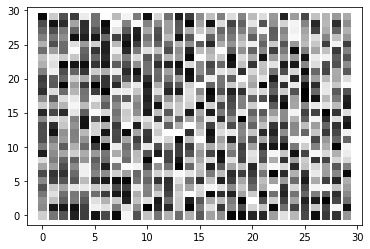

In [0]:
showData2D(a)

In [0]:
kmeans = KMeans(n_clusters=10, random_state=1)

In [0]:
kmeans.fit(a[:,:2],sample_weight=a[:,2])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [0]:
center = kmeans.cluster_centers_

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


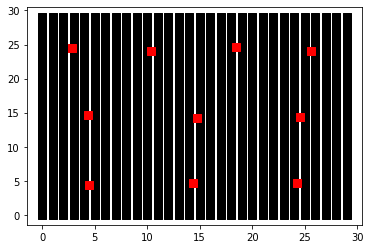

In [0]:
# data = data
data = a
plt.scatter((data[:,1]),np.flip(data[:,0]),c =(0,0,0),s =60,marker="s")
plt.scatter(center[:,0],center[:,1],c =(1,0,0),s =60,marker="s")

In [0]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv2.kmeans(np.float32(data[:,:2]),10,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [0]:
center

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


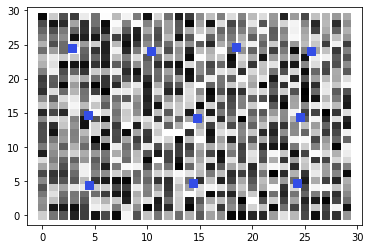

In [0]:
# data = data
x = data[:,2]
plt.scatter((data[:,1]),np.flip(data[:,0]),c = data[:,2],cmap='gray',s =60,marker="s")
plt.scatter(center[:,0],center[:,1],c =(0.2,0.3,0.9),s =60,marker="s")

In [0]:
def getCenter(data):
  kmeans = KMeans(n_clusters=10, random_state=1)
  kmeans.fit(a[:,:2],sample_weight=a[:,2])
  center = kmeans.cluster_centers_
  return center

In [0]:
def distance(a,b):
  return (  ((a[0]-b[0])**2)+ ((a[1]-b[1])**2) )**(1/2)

In [0]:
def distancei(a,b,i):
  return abs(a[i]-b[i])
  # return (  ((a[0]-b[0])**2)+ ((a[1]-b[1])**2) )**(1/2)

In [0]:
def getGRAD(input,data):
  center  = getCenter(data)
  l = input[:(index*2)].reshape(-1,2)
  ret = np.copy(input)
  for x in range(len(l)):
    mina = 999999
    for y in range(len(center)):
      d = distancei(l[x],center[y])
      if(d<mina):
        mina = d
    ret[x*2]=mina
    ret[(x*2)+1]=mina
    ret[(index*2)+x]=mina
  return ret

In [0]:
from sklearn.cluster import KMeans
def getCenter(data):
  kmeans = KMeans(n_clusters=10, random_state=1)
  kmeans.fit(a[:,:2],sample_weight=a[:,2])
  center = kmeans.cluster_centers_
  return center
def distancei(a,b,i):
  return abs(a[i]-b[i])
  # return (  ((a[0]-b[0])**2)+ ((a[1]-b[1])**2) )**(1/2)
def getGRAD(input,data):
  center  = getCenter(data)
  l = input[:(index*2)].reshape(-1,2)
  ret = np.copy(input)
  for x in range(len(l)):
    mina = 999999
    for y in range(len(center)):
      d = distancei(l[x],center[y])
      if(d<mina):
        mina = d
    ret[x*2]=mina
    ret[(x*2)+1]=mina
    ret[(index*2)+x]=mina
  return ret

In [0]:
a = np.array([1,2,3,4,5,6])
a.reshape(-1,2)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [0]:
a = a[a[:,2]<(threshold/2)]

In [0]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv2.kmeans(np.float32(a[:,:2]),10,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [0]:
center

array([[ 1.75     ,  3.6666667],
       [ 5.555556 , 23.555555 ],
       [13.44     , 24.72     ],
       [16.214287 ,  3.357143 ],
       [15.296296 , 13.111112 ],
       [ 4.1      , 12.2      ],
       [ 8.36     ,  5.8399997],
       [25.956522 ,  6.173913 ],
       [24.615385 , 16.538462 ],
       [24.296297 , 24.777779 ]], dtype=float32)

In [0]:
X = np.random.randint(25,50,(25,2))
Y = np.random.randint(60,85,(25,2))
Z = np.vstack((X,Y))

In [0]:
print(Z.shape)
a.shape

(50, 2)


(900, 3)

In [0]:
a[:,:2].shape

(900, 2)

In [0]:
s = np.random.rand(30,30)
cv2_imshow(s*255)

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline

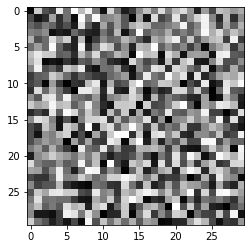

In [0]:
plt.imshow(s,cmap="gray")

In [0]:
def showData2D(data):
  plt.scatter((data[:,1]),np.flip(data[:,0]),c = data[:,2],s =90,cmap = "gray",marker="s")

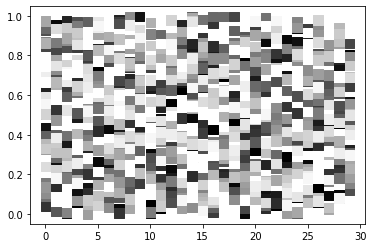

In [0]:
showData2D(a)

In [0]:
indicesArray.shape

(1024, 768, 2)

In [0]:
np.expand_dims(colourArray,0)

array([[[[85],
         [84],
         [84],
         ...,
         [92],
         [92],
         [92]],

        [[92],
         [92],
         [92],
         ...,
         [94],
         [95],
         [95]],

        [[95],
         [95],
         [95],
         ...,
         [93],
         [93],
         [93]],

        ...,

        [[95],
         [95],
         [95],
         ...,
         [88],
         [89],
         [89]],

        [[89],
         [87],
         [87],
         ...,
         [92],
         [91],
         [90]],

        [[92],
         [91],
         [90],
         ...,
         [83],
         [83],
         [83]]]])

In [0]:
def ImageToData2D(img):
    colourArray = np.array(img).reshape((img.shape[1],img.shape[0]) + (1,))
    indicesArray = np.moveaxis(np.indices((img.shape[1],img.shape[0])), 0, 1)
    print(indicesArray)
    print(colourArray)
    allArray = np.dstack((indicesArray, colourArray)).reshape((-1, 3))
    
    return allArray
df = pd.DataFrame(allArray, columns=["y", "x", "weight"])

In [0]:
colourArray

In [0]:
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ImageToData2D(img)

[[[   0    0    0 ...    0    0    0]
  [   0    1    2 ...  765  766  767]]

 [[   1    1    1 ...    1    1    1]
  [   0    1    2 ...  765  766  767]]

 [[   2    2    2 ...    2    2    2]
  [   0    1    2 ...  765  766  767]]

 ...

 [[1021 1021 1021 ... 1021 1021 1021]
  [   0    1    2 ...  765  766  767]]

 [[1022 1022 1022 ... 1022 1022 1022]
  [   0    1    2 ...  765  766  767]]

 [[1023 1023 1023 ... 1023 1023 1023]
  [   0    1    2 ...  765  766  767]]]
[[[85]
  [84]
  [84]
  ...
  [92]
  [92]
  [92]]

 [[92]
  [92]
  [92]
  ...
  [94]
  [95]
  [95]]

 [[95]
  [95]
  [95]
  ...
  [93]
  [93]
  [93]]

 ...

 [[95]
  [95]
  [95]
  ...
  [88]
  [89]
  [89]]

 [[89]
  [87]
  [87]
  ...
  [92]
  [91]
  [90]]

 [[92]
  [91]
  [90]
  ...
  [83]
  [83]
  [83]]]


ValueError: ignored

In [0]:
colourArray.shape

(1024, 768, 3)

In [0]:
indicesArray

array([[[   0,    0],
        [   0,    1],
        [   0,    2],
        ...,
        [   0,  765],
        [   0,  766],
        [   0,  767]],

       [[   1,    0],
        [   1,    1],
        [   1,    2],
        ...,
        [   1,  765],
        [   1,  766],
        [   1,  767]],

       [[   2,    0],
        [   2,    1],
        [   2,    2],
        ...,
        [   2,  765],
        [   2,  766],
        [   2,  767]],

       ...,

       [[1021,    0],
        [1021,    1],
        [1021,    2],
        ...,
        [1021,  765],
        [1021,  766],
        [1021,  767]],

       [[1022,    0],
        [1022,    1],
        [1022,    2],
        ...,
        [1022,  765],
        [1022,  766],
        [1022,  767]],

       [[1023,    0],
        [1023,    1],
        [1023,    2],
        ...,
        [1023,  765],
        [1023,  766],
        [1023,  767]]])

In [0]:
allArray  

array([[   0,    0,   60,  106,   41],
       [   0,    1,   59,  105,   40],
       [   0,    2,   59,  105,   40],
       ...,
       [1023,  765,   58,  104,   42],
       [1023,  766,   58,  104,   42],
       [1023,  767,   58,  104,   42]])

In [0]:
df.head()

,y,x,red,green,blue
0,0,0,60,106,41
1,0,1,59,105,40
2,0,2,59,105,40
3,0,3,58,104,39
4,0,4,58,104,39
